# Take Home test Nu MX 2022

## Data Wrangling + Exploration

In the next code cell, we charge the datasets that help us in the first section. We wil use `pandas` Python library in order to manipulate the datasets. 

In [1]:
import pandas as pd
magic_towns=pd.read_csv('pueblos_magicos.csv')
mexico_tourism=pd.read_csv('turismo_mexico.csv')

We show a preview of the data sets. Firstly, we show the head of `pueblos_magicos.csv`.

In [2]:
magic_towns.head()

,pueblo_magico,estado,pob_2010,pob_2015
0,Asientos,Aguascalientes,48358,50864
1,Calvillo,Aguascalientes,57627,60760
2,San José de Gracia,Aguascalientes,7160,9661
3,Tecate,Baja California,89999,110870
4,La Paz,Baja California Sur,265717,293687


Then, we show the head of `turismo_mexico.csv` dataset.

In [3]:
mexico_tourism.head()

,fecha,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas _fronterizos,pasajeros_crucero
0,01/01/16,7808,1690,1152,4332,634
1,01/02/16,7666,1683,1048,4250,685
2,01/03/16,8625,1983,1224,4678,739
3,01/04/16,7717,1601,1083,4451,582
4,01/05/16,7665,1548,1154,4538,424


### Exploratory Data Analysis

In the following we are going to answer a pair of questions using the datasets.

#### What were the ten Pueblos mágicos with the most population in 2015?

In order to answer this question we order the dataset by that column storing that information in a new variable, and then we obtain the firts then rows corresponding to ten Pueblos máxicos with de most population in 2015.

In [4]:
pob_2015_magic_towns=magic_towns.sort_values(['pob_2015'],ascending=False)
pob_10_towns_most=pob_2015_magic_towns['pueblo_magico'][:10]
print(pob_10_towns_most)

44                      Tlaquepaque
4                            La Paz
48                          Metepec
18       San Cristóbal de las Casas
117                       Guadalupe
113                        Papantla
15             Comitán de Domínguez
37                  Lagos de Moreno
81               San Andrés Cholula
67     Bahía de Banderas (Sayulita)
Name: pueblo_magico, dtype: object


The last list shows the 10 Pueblos mágicos with the most population in 2015.

#### What were the ten Pueblos mágicos with de least population in 2010?

We do the same, store in a variable the dataframe of Pueblos mágicos ordered in base of `pob_2010` column, then we print the registers of interest. 

In [5]:
pob_2010_magic_towns=magic_towns.sort_values(['pob_2010'])
pob_10_towns_least=pob_2010_magic_towns['pueblo_magico'][:10]
print(pob_10_towns_least)

72                  Capulálpam de Méndez
8                                Candela
10                              Guerrero
68                            Bustamante
105                                 Mier
74     San Pedro y San Pablo Teposcolula
122              Teúl de González Ortega
40               San Sebastián del Oeste
2                     San José de Gracia
33                     Mineral del Chico
Name: pueblo_magico, dtype: object


These are the ten Pueblos mágicos with the least population in 2010.

### Data Wrangling

We create a `DataFrame` with the table in the exam's PDF containing the Full name and the corresponding ISO code. 

In [6]:
df_estado_iso=pd.read_csv('estado_iso.csv')
df_estado_iso.sort_values(['Full name'],inplace=True)
df_estado_iso.head()

,Full name,3-letter-code
0,Aguascalientes,AGU
1,Baja California,BCN
2,Baja California Sur,BCS
3,Campeche,CAM
6,Chiapas,CHP


First of all, we are going to check if the data in `Full name` is equal to the set of states storing in `estado` column in the original `pueblos_magicos.csv`. In the next cell, we charge the different registers of `df_estado_iso` and `pueblos_magicos.csv`and check if the two list of states are equal

In [7]:
states_full_name=df_estado_iso['Full name'].to_list()
states_full_name.sort()
states_original=list(set(magic_towns['estado']))
states_original.sort()
print(states_full_name==states_original)

False


The last result is `False`, then we are going to check the set of states in the original data set `pueblos_magicos.csv`.

In [8]:
states_original

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Mexico',
 'Michoacan',
 'Morelos',
 'Nayarit',
 'Nuevo Leon',
 'Oaxaca',
 'Puebla',
 'Queretaro',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatan',
 'Zacatecas',
 'Zacatezas']

We can see a problem with a typo in writting Zacatecas, therefore exists a row with a state `Zacatezas` instead of `Zacatecas`. We are going to repair that mistake in the dataset. We will replace `Zacatezas` with `Zacatecas` and then check if the set of states of the setting dataset is equal to the list of states in the table `df_estado_iso`.

In [9]:
magic_towns.loc[magic_towns['estado']=='Zacatezas','estado']='Zacatecas'
states_original_correct=list(set(magic_towns['estado']))
states_original_correct.sort()
print(states_original_correct==states_full_name)

True


Finally, with the same set of states in the original dataset and `df_estado_iso` we can set the `estado` column with the corresponding ISO code using a dictionary with de `Full name` as a key and `3-letter-code` as a value.

In [10]:
dic_states_original_correct=pd.Series(df_estado_iso['3-letter-code'].values,index=df_estado_iso['Full name']).to_dict()
for state in states_full_name:
    magic_towns.loc[magic_towns['estado']==state,'estado']=dic_states_original_correct[state]
magic_towns.head()

,pueblo_magico,estado,pob_2010,pob_2015
0,Asientos,AGU,48358,50864
1,Calvillo,AGU,57627,60760
2,San José de Gracia,AGU,7160,9661
3,Tecate,BCN,89999,110870
4,La Paz,BCS,265717,293687


### Analysis

In this section, we show a executive summary for the historical evolution of International tourism in Mexico. 

Before to begin, we see the main info and check the differents cathegories of tourism. 

In [11]:
mexico_tourism['fecha'] = pd.to_datetime(mexico_tourism['fecha'],dayfirst=True)
mexico_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha                        71 non-null     datetime64[ns]
 1   visitantes_internacionales   71 non-null     int64         
 2   turismo_al_interior          71 non-null     int64         
 3   turismo_fronterizo           71 non-null     int64         
 4   excursionistas _fronterizos  71 non-null     int64         
 5   pasajeros_crucero            71 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.5 KB


We have four tourism cathegories:

1. turismo al interior
2. turismo fronterizo
3. excursionistas fronterizos
4. pasajeros crucero

From the dataset we obtain the information of what years and months we have information of international tourism.

In [12]:
year_tourism=mexico_tourism['fecha'].dt.year
month_tourism=mexico_tourism['fecha'].dt.month
mexico_tourism['year']=year_tourism
mexico_tourism['month']=month_tourism
set_years_tourism=set(year_tourism)
set_months_tourism=set(month_tourism)
print(set_years_tourism)
print(set_months_tourism)

{2016, 2017, 2018, 2019, 2020, 2021}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [13]:
print('First day of registration ',mexico_tourism.iloc[0]['fecha'])
print('Last day of registration ',mexico_tourism.iloc[-1]['fecha'])

First day of registration  2016-01-01 00:00:00
Last day of registration  2021-11-01 00:00:00


First, we plot the evolution of total tourism from `01/01/2016` to `01/11/2021`

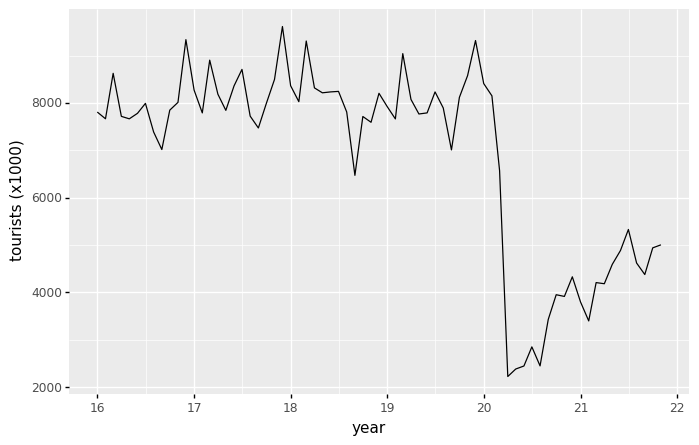

<ggplot: (8773811589458)>

In [37]:
from plotnine import *
#mexico_tourism.plot(x='fecha',y='visitantes_internacionales',figsize=(10,5),color='black',grid=True,ylabel='tourists (per 1000)')
gg1=ggplot(mexico_tourism)+geom_line(aes(x='fecha',y='visitantes_internacionales'))+theme(figure_size=(8,5))+labs(x='year',y='tourists (x1000)')+scale_x_date(date_breaks='1 year',date_labels='%y')
gg1

Afterwards, we plot  the evolution of the international tourism per cathegory in all the time range we have.

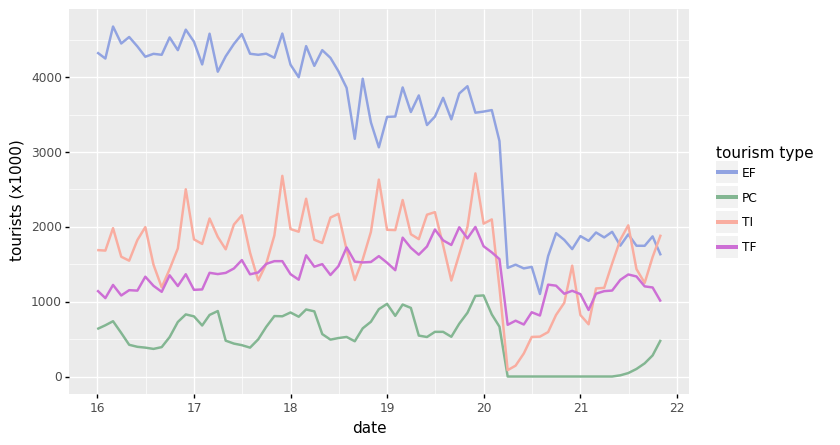

<ggplot: (8773848562219)>

In [113]:
colors_palette=["#91A3E1", "#83B692","#F9ADA0", "#CD6FD5"]
tourism_cathegory=list(mexico_tourism.columns[2:6])
dfm_mexico_tourism = mexico_tourism.melt(id_vars=['year', 'fecha'], value_vars=tourism_cathegory)
gg2=ggplot(dfm_mexico_tourism)+geom_line(aes(x='fecha',y='value',color='variable',group='variable'),size=1)+theme(figure_size=(10,5))+scale_x_date(date_breaks='1 year',date_labels='%y')+theme(figure_size=(8,5))+labs(x='date', y='tourists (x1000)')+scale_color_manual(values=colors_palette,name='tourism type',labels=['EF','PC','TI','TF'])
gg2

Where EF,PC,TI, and TF correspond to *excursionistas fronterizos*,*pasajeros crucero*,*turismo al interior*, and *turismo fronterizo* respectively.

We see the evolution of the tourism from 2016 to 2021. Clearly, at the beginning of 2020 we observe an abrupt decreasing of the four tourism cathegories. It could be for the COVID-19 pandemic. Moreover, we observe a in different proportion each cathegory after 2020. Before 2020 we observed in decreasing order of proportion EF, TI, TF, and PC. 

We continue to evaluate the distribution of each tourism cathegory. We are going to see this with a boxplot.

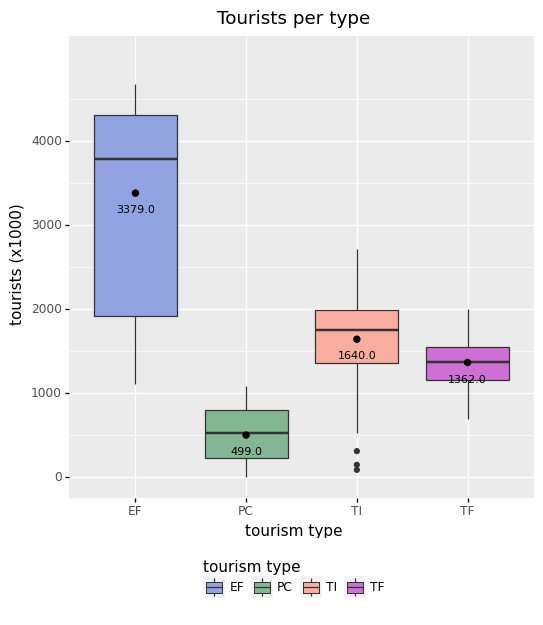

<ggplot: (8773811797339)>

In [115]:
import numpy as np
def mean(x):
    return np.mean(x)
means=pd.DataFrame(mexico_tourism[tourism_cathegory].mean())
#mexico_tourism.boxplot(column=tourism_cathegory,figsize=(10,7),showmeans=True)
gg3=ggplot(dfm_mexico_tourism)+geom_boxplot(aes('variable','value'))+labs(x='tourism type',y='tourists (x1000)')
gg3= (
    ggplot(dfm_mexico_tourism, aes(x="variable", y="value"))
    + geom_boxplot(aes(fill="variable"))
    + xlab("tourism type")
    + ylab("tourists (x1000)")
    + scale_y_continuous(breaks=np.arange(0, 5000, 1000), 
                         limits=[0, 5000])
    + scale_x_discrete(labels=['EF','PC','TI','TF'])
    + ggtitle("Tourists per type")
    + theme(figure_size=(6,6),legend_position="bottom",legend_box_spacing=0.4)
    + stat_summary(fun_y= mean, geom="point", colour="black", size=2,
               position = position_dodge2(width = 0.75))
    +guides(fill=guide_legend(title="tourism type"))
    +scale_fill_manual(values=colors_palette,labels=['EF','PC','TI','TF'])
    +annotate(geom='text',x=1,y=np.floor(means.loc['excursionistas _fronterizos'][0])-200,label=np.floor(means.loc['excursionistas _fronterizos'][0]),size = 8)
    +annotate(geom='text',x=2,y=np.floor(means.loc['pasajeros_crucero'][0])-200,label=np.floor(means.loc['pasajeros_crucero'][0]),size = 8)
    +annotate(geom='text',x=3,y=np.floor(means.loc['turismo_al_interior'][0])-200,label=np.floor(means.loc['turismo_al_interior'][0]),size = 8)
    +annotate(geom='text',x=4,y=np.floor(means.loc['turismo_fronterizo'][0])-200,label=np.floor(means.loc['turismo_fronterizo'][0]),size = 8)
)
gg3

The last plot show outliers in `turismo_al_interior` and asymmetry in `excursionistas_fronterizos`. That could be explain for the bigger drop in 2020 of this cathegories in a short period of time with respect to the others. In addition, we observe a high variability in the cathegory of `excursionistas_fronterizos`, therefore we can draw from the data that this tourism type changed more from 2016 to 2021. Moreover, we show in number the mean of each cathegory during that period.

Finally, we are going to show the mean proportion of each tourism cathegory per year. 

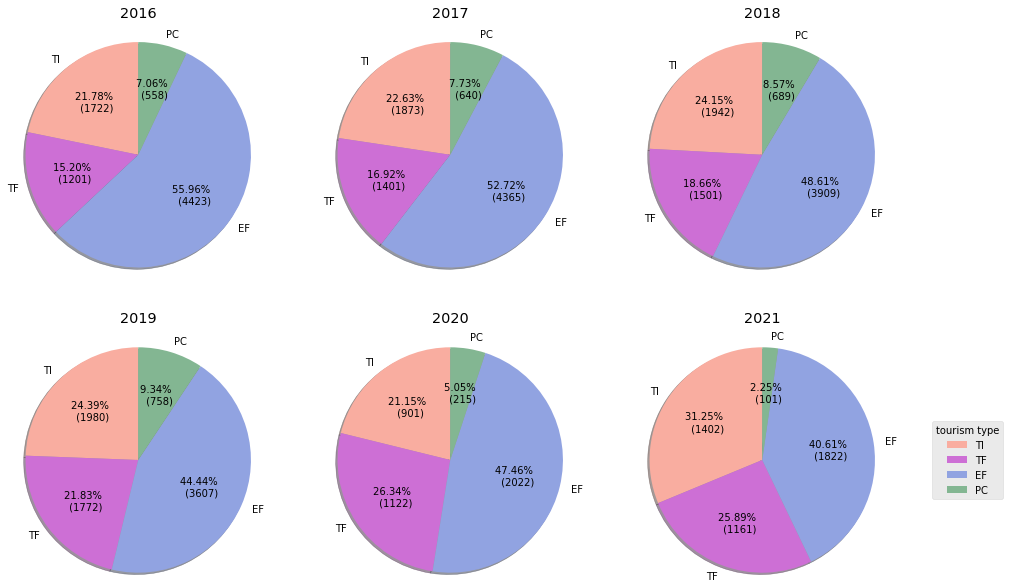

In [162]:
# Import libraries
from matplotlib import pyplot as plt
plt.style.use('ggplot')
fig,axs= plt.subplots(2,3,figsize=(15,15))
list_of_years=list(set_years_tourism)
dic_tourism_cathegory={
'excursionistas _fronterizos':'EF',
'pasajeros_crucero':'PC',
'turismo_al_interior':'TI',
'turismo_fronterizo':'TF'
}
dic_colors_cathegory={
'excursionistas _fronterizos':colors_palette[0],
'pasajeros_crucero':colors_palette[1],
'turismo_al_interior':colors_palette[2],
'turismo_fronterizo':colors_palette[3]
}
index_year=0
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct
for i in range(2):
    for j in range(3):
        df_aux=mexico_tourism[mexico_tourism['year']==list_of_years[index_year]]
        total_tourists=df_aux['visitantes_internacionales'].to_numpy()
        mean_total_tourists=np.mean(total_tourists)
        df_aux=df_aux[tourism_cathegory]
        cathegory_mean=pd.DataFrame(df_aux.mean())
        pie_labels=[dic_tourism_cathegory[c] for c in cathegory_mean.index.to_list()]
        pie_colors=[dic_colors_cathegory[c] for c in cathegory_mean.index.to_list()]
        wedges, texts, autotexts=axs[i,j].pie(cathegory_mean[0].to_numpy(),
        autopct = make_autopct(cathegory_mean[0].to_numpy()),
        shadow = True,
        labels=pie_labels,
        colors=pie_colors,
        startangle = 90,
        textprops=dict(color='k', fontsize=10),
        radius=1.2
        )
        axs[i,j].set_title(list_of_years[index_year],pad=20)
        index_year+=1
# Adding legend
axs[i,j].legend(wedges, pie_labels,
    title ="tourism type",
    loc ="center left",
    bbox_to_anchor =(1.2, 0, 0.6, 1))
#for ax in axs.flat:
#    ax.set(xlabel='days', ylabel='infected')
#for ax in axs.flat:
#    ax.label_outer()
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.7, 
                    wspace=0.3, 
                    hspace=0.3)


In this plot, we show the mean proportion of each tourism cathegory per year. We observe an increasing behavior of `turismo al interior` with respect to the mean of each year. Analogously, we observe that in `turismo fronterizo`, with the only exception of 2020 where every cathegory dropped. On the other hand, we observe an decreasing behavior from 2016 to 2022 of `pasajeros crucero` and `excursionistas fronterizos`. 

We have already seen that each cathegory drop from 2019 to 2020. Computing the relative drop from 2019 to 2020 of each cathegory we obtain that `pasajeros crucero` dropped to 28% of tourists with respect to 2019,`turismo al interior` dropped to 45%, `excursionistas fronterizos` dropped to 59%, and `turismo fronterizo` dropped to 63% with respect to 2019's data. We can conclude that `pasajeros crucero` was the cathegory with the higher drop with respect to the mean in 2020.

### Creativity to communicate analytical results

Finally, we will answer The Leadership team's question: *The number of Pueblos mágicos in each state*

It is an interesting question know if there are states that do not have *Pueblos mágicos*, therefore a barplot is natural option for that task because we can see and contrast the number of *Pueblos mágicos* of each Mexico state. However, in this plot we have 32 states and it could be difficult to see the exact number of *Pueblos mágicos* and how many states have the same number of *Pueblos mágicos*. 

In the following code cell we will show the plot that tries to solve those problems with barplot and with the information required by The Leadership team.

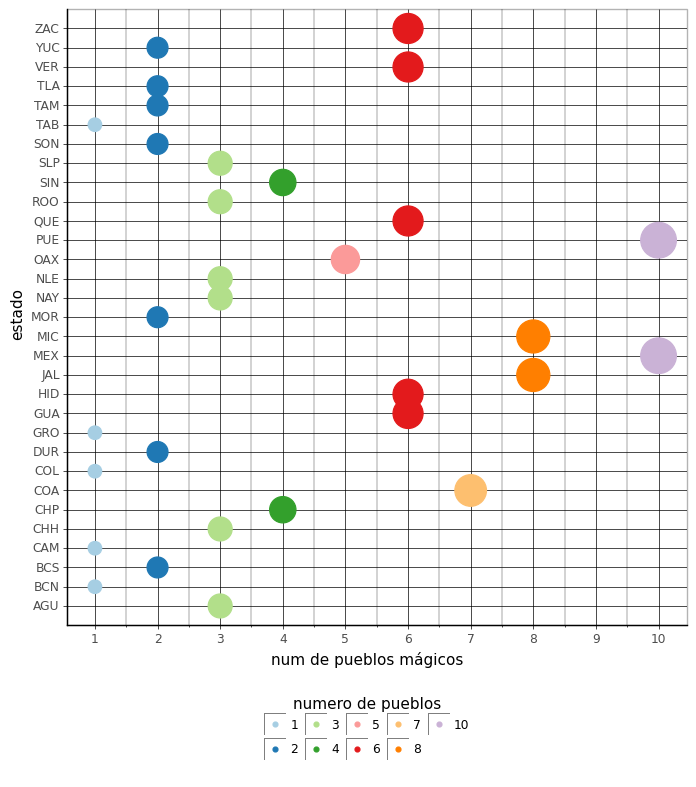

<ggplot: (8773810421489)>

In [318]:
dic_num_magic_towns_per_state={}
estado_iso_code=df_estado_iso['3-letter-code'].to_list()
for state in estado_iso_code:
    df_aux=magic_towns[magic_towns['estado']==state]
    dic_num_magic_towns_per_state[state]=df_aux.shape[0]
df_num_magic_towns_per_state=pd.DataFrame({'estado':dic_num_magic_towns_per_state.keys(),'num_pueblos_magicos':dic_num_magic_towns_per_state.values()})
gg5=(
    ggplot(df_num_magic_towns_per_state,aes(x='estado',y='num_pueblos_magicos'))
    +geom_point(aes(size='num_pueblos_magicos',color='factor(num_pueblos_magicos)'))
    +scale_size_continuous(guide=False,range=(5,14))
    +scale_color_brewer(type='qual',palette=3,name='numero de pueblos')
    +scale_x_discrete(expand=(0, 1))
    +labs(x='estado',y='num de pueblos mágicos')
    +scale_y_continuous(breaks=np.arange(1,11,1))
    +coord_flip()
    +theme_light()
    +theme(figure_size=(8,8),legend_position="bottom",legend_box_spacing=0.5,line=element_line(color='black'),
    legend_title_align='center')
)
gg5

The last graphs in x-axis has the number of *Pueblos mágicos* and in y-axis the states of Mexico. For each row or state we have a dot with center aligned with the exact number *Pueblos mágicos* in that state, therefore we answer the main question. In addition, we can observe that points with the same color correspond to states with the same number of *Pueblos mágicos* and the legend says what is the number of *Pueblos mágicos* these states have. Moreover, the size of the dots increase with the number of *Pueblos mágicos* that represent. The increasing size helps to identify how many states have the maximum and minimun number of *Pueblos mágicos*, then you can identify what are these states.

## Machine Learning solutions mindset

The **Business use case** we choose is **Case 1**. We propose a solution for accepting credit card customers in a digital bank. 

### Step 1
First of all, we think in the database which help us to make a decision. 

